In [1]:
'''===================================
Time Series Analysis and Forecasting - Q01 - 19/Oct
==================================='''
# Required libraries
import pandas as pd
from pandas_datareader import data

# Get the DAX index from Yahoo
DAX = data.DataReader(name='^GDAXI', data_source='yahoo', start='2022-1-1')
DAX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,16069.379883,15943.160156,15947.440430,16020.730469,56865800,16020.730469
2022-01-04,16202.580078,16036.519531,16069.799805,16152.610352,75187400,16152.610352
2022-01-05,16285.349609,16161.719727,16177.440430,16271.750000,68244500,16271.750000
2022-01-06,16156.559570,15988.629883,16076.160156,16052.030273,75756700,16052.030273
2022-01-07,16044.280273,15862.709961,15999.019531,15947.740234,74469300,15947.740234


——
Give the code above, resample the DAX data to get the following:
- closing price for first business day of every month 
- closing price for first day of every month (assume previous day value if its a non-working day)

In [2]:
DAX.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-10-06', '2022-10-07', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-17',
               '2022-10-18', '2022-10-19'],
              dtype='datetime64[ns]', name='Date', length=206, freq=None)

In [3]:
DAX

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,16069.379883,15943.160156,15947.440430,16020.730469,56865800,16020.730469
2022-01-04,16202.580078,16036.519531,16069.799805,16152.610352,75187400,16152.610352
2022-01-05,16285.349609,16161.719727,16177.440430,16271.750000,68244500,16271.750000
2022-01-06,16156.559570,15988.629883,16076.160156,16052.030273,75756700,16052.030273
2022-01-07,16044.280273,15862.709961,15999.019531,15947.740234,74469300,15947.740234
...,...,...,...,...,...,...
2022-10-13,12379.240234,12000.429688,12114.230469,12355.580078,88446300,12355.580078
2022-10-14,12676.419922,12395.990234,12549.019531,12437.809570,82478300,12437.809570
2022-10-17,12716.809570,12398.049805,12467.540039,12649.030273,57195500,12649.030273


In [4]:
dax_close = DAX['Close']

dax_close.head()

Date
2022-01-03    16020.730469
2022-01-04    16152.610352
2022-01-05    16271.750000
2022-01-06    16052.030273
2022-01-07    15947.740234
Name: Close, dtype: float64

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

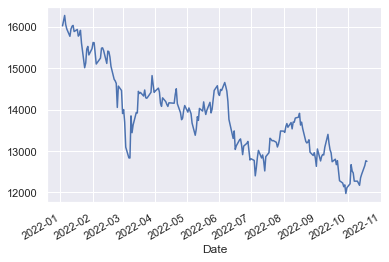

In [6]:
dax_close.plot()

In [7]:
dax_close_bms = dax_close.asfreq('BMS')

#### Given below is the closing price on the first business day of the month.

In [8]:
dax_close_bms

Date
2022-01-03    16020.730469
2022-02-01    15619.389648
2022-03-01    13904.849609
2022-04-01    14446.480469
2022-05-02    13939.070312
2022-06-01    14340.469727
2022-07-01    12813.030273
2022-08-01    13479.629883
2022-09-01    12630.230469
2022-10-03    12209.480469
Freq: BMS, Name: Close, dtype: float64

In [9]:
dax_close_ms = dax_close.asfreq('MS')

In [10]:
dax_close_ms

Date
2022-02-01    15619.389648
2022-03-01    13904.849609
2022-04-01    14446.480469
2022-05-01             NaN
2022-06-01    14340.469727
2022-07-01    12813.030273
2022-08-01    13479.629883
2022-09-01    12630.230469
2022-10-01             NaN
Freq: MS, Name: Close, dtype: float64

In [11]:
dax_close_ms_ffill = dax_close_ms.fillna(method="pad")


#### Given below is the closing price at the start of the month, along with filled from previous available values for non-working days

In [12]:
dax_close_ms_ffill

Date
2022-02-01    15619.389648
2022-03-01    13904.849609
2022-04-01    14446.480469
2022-05-01    14446.480469
2022-06-01    14340.469727
2022-07-01    12813.030273
2022-08-01    13479.629883
2022-09-01    12630.230469
2022-10-01    12630.230469
Freq: MS, Name: Close, dtype: float64

#### References - 

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

#### Alternate method by Sir

In [14]:
## Here we first need to get the data for all dates (re-index)
timeindex = pd.date_range("2022-01-01", "2022-10-18", freq="D")
s = DAX.reindex(timeindex)
s.ffill(inplace=True)                      #forward fill 
s.resample("MS").asfreq()['Close'] 

2022-01-01             NaN
2022-02-01    15619.389648
2022-03-01    13904.849609
2022-04-01    14446.480469
2022-05-01    14097.879883
2022-06-01    14340.469727
2022-07-01    12813.030273
2022-08-01    13479.629883
2022-09-01    12630.230469
2022-10-01    12114.360352
Freq: MS, Name: Close, dtype: float64